In [1]:
#Import required packages
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import numpy as np
import seaborn as sns

In [2]:
# Import data and show all columns that can be accessed
yields = pd.read_csv("crop_yield.csv")
print(yields.columns.tolist())

['collectionDate', 'A-q102_state', 'A-q103_district', 'A-q104_subDistrict', 'A-q105_village', 'A-q111_fGender', 'A-q112_fEdu', 'A-q114_socialCategory', 'A-q116_crop', 'A-q117_season', 'C-q301_LLU', 'C-q302_acreConv', 'C-q303_cultLand', 'C-q304_cropCultLand', 'C-q305_cropLargestArea', 'C-q306_cropLarestAreaAcre', 'C-q307_largestPlotType', 'D-q401_soilTexture', 'D-q402_drainClass', 'D-q403_soilPerception', 'D-prevCrop', 'D-otherPrevCrop', 'D-q404_prevCrop', 'D-prevCropTillage', 'D-otherPrevCropTillage', 'D-q405_prevCropTillage', 'D-q406_prevCropHarvest', 'D-q407_cropResiduePcnt', 'D-q408_residueBurnt', 'D-q409_varType', 'D-q410_varName', 'D-q411_LandPrep', 'D-q412_RotUseYear', 'D-q413_CropEst', 'D-q414_rcNursEstDate', 'D-q415_seedingSowingTransDate', 'D-q418_nursDetFactor', 'D-q419_transDetFactor', 'D-q420_cropSeedAmt', 'D-q421_seedSource', 'D-q422_otherSeedSource', 'E-q5105_statSHC', 'E-q5101_FYM', 'E-q5102_typeFYM', 'E-q5103_amtFYM', 'E-q5104_applyMineralFert', 'F-basalFerts', 'F-q5202

C:\Users\User\AppData\Local\Temp\ipykernel_2316\50514433.py:2: DtypeWarning: Columns (21,24,40,57,80,104,128,131,132,134,138,140,142,143,144,145,146,154,157,158,174,179,181,188) have mixed types. Specify dtype option on import or set low_memory=False.
  yields = pd.read_csv("crop_yield.csv")


In [3]:
#Description for each variable
for e in yields.columns.to_list():
    print(yields[e].head())

0    19-02-2020
1    19-02-2020
2    19-02-2020
3    19-02-2020
4    19-02-2020
Name: collectionDate, dtype: object
0    Andhra Pradesh
1    Andhra Pradesh
2    Andhra Pradesh
3    Andhra Pradesh
4    Andhra Pradesh
Name: A-q102_state, dtype: object
0    Anantapur
1    Anantapur
2    Anantapur
3    Anantapur
4    Anantapur
Name: A-q103_district, dtype: object
0    Atmakur
1    Atmakur
2    Atmakur
3    Atmakur
4    Atmakur
Name: A-q104_subDistrict, dtype: object
0    Y. Kothapalli
1    Y. Kothapalli
2     Singhampalli
3     Sunghampalli
4      Singampalli
Name: A-q105_village, dtype: object
0    male
1    male
2    male
3    male
4    male
Name: A-q111_fGender, dtype: object
0        primary
1    noSchooling
2        primary
3        primary
4        primary
Name: A-q112_fEdu, dtype: object
0    General
1    General
2        OBC
3        OBC
4        OBC
Name: A-q114_socialCategory, dtype: object
0    Rice
1    Rice
2    Rice
3    Rice
4    Rice
Name: A-q116_crop, dtype: object
0    Kh

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: J-q5602_1herbAppDays, dtype: float64
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: J-q5603_2herbName, dtype: object
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: J-q5604_2herbAppDays, dtype: float64
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: J-q5605_3herbName, dtype: object
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: J-q5606_3herbAppDays, dtype: float64
0    3.0
1    3.0
2    3.0
3    3.0
4    3.0
Name: J-manualWeedTimes, dtype: float64
0    20.0
1    20.0
2    20.0
3    20.0
4    20.0
Name: J-q5607_1manualWeeding, dtype: float64
0    40.0
1    40.0
2    40.0
3    40.0
4    40.0
Name: J-q5608_2manualWeeding, dtype: float64
0    60.0
1    60.0
2    60.0
3    60.0
4    60.0
Name: J-q5609_3manualWeeding, dtype: float64
0    Rc_Ischaemum_rugosum Rc_Eragrostis_tenella Rc_...
1    Rc_Dactyloctenium_aegyptium Rc_Rottboellia_coc...
2    Rc_Leptochloa_species Rc_Rottboellia_cochinchi...
3    Rc_Ischaemum_rugosum Rc_Leersia_hexandra Rc

In [4]:
# Examine time
# Convert to datetime
dates = pd.to_datetime(yields['collectionDate'], dayfirst=True, errors='coerce')

# Drop NaT if needed
cleaned_dates = dates.dropna()

# Find earliest and latest
earliest = cleaned_dates.min()
latest = cleaned_dates.max()

print("Earliest date:", earliest)
print("Latest date:", latest)
print("Unparseable entries: ", len(yields['collectionDate'][dates.isna()]))



Earliest date: 2018-06-12 00:00:00
Latest date: 2020-03-19 00:00:00
Unparseable entries:  417


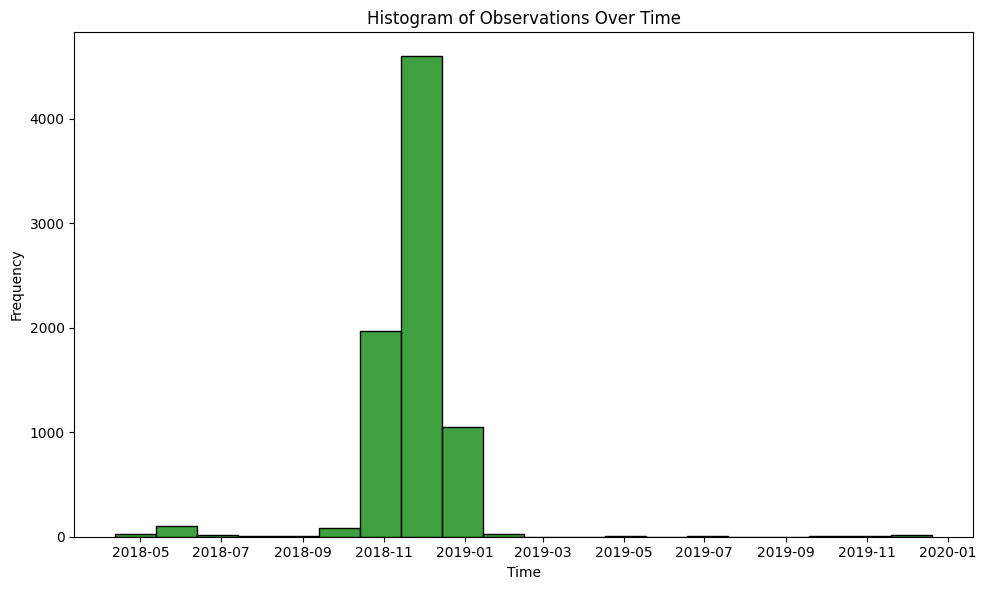

In [5]:
# Ensure the 'time' column is in datetime format
yields['time'] = pd.to_datetime(yields['L-q601_harvestDate'], errors='coerce', dayfirst=True)

# Filter out rows with invalid or missing time values
yields = yields.dropna(subset=['time'])

# Limit time to 2018-04 to 2019-01
start_date = '2018-04-01'
end_date = '2020-01-31'
yields = yields[(yields['time'] >= start_date) & (yields['time'] <= end_date)]

# Plot distribution over time
plt.figure(figsize=(10, 6))
sns.histplot(yields['time'], bins=20, color='green', edgecolor='black')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Histogram of Observations Over Time')
plt.grid(False)
plt.tight_layout()
plt.savefig(f"Figures/lol_rice_time.png", dpi=300)
plt.show()

In [6]:
# Print crop types and crop cultivars
print(yields['D-q409_varType'].value_counts())
print()
print(yields['D-q410_varName'].value_counts())

D-q409_varType
Improved    5787
Hybrid      1491
Local        625
Basmati       20
Unknown       12
Name: count, dtype: int64

D-q410_varName
Arize6444Gold           777
MTU7029                 708
MTU_7029                651
SambaMahsuri_BPT5204    585
BPT5204                 336
                       ... 
Bharani_NLR30491          1
Sampada                   1
OtherSamriddhi555         1
OtherYamuna Gold          1
CR_Dhan_501               1
Name: count, Length: 543, dtype: int64


In [7]:
# describe yields of each crop type (unfiltered data, in the thesis, data is presented after filtering. 
# For those numbers, see single product model)
improved = yields[yields['D-q409_varType']== 'Improved']
print(improved["L-tonPerHectare"].describe())
print()

hybrid = yields[yields['D-q409_varType']== 'Hybrid']
print(hybrid["L-tonPerHectare"].describe())
print()

local = yields[yields['D-q409_varType']== 'Local']
print(local["L-tonPerHectare"].describe())
print()

basmati = yields[yields['D-q409_varType']== 'Basmati']
print(basmati["L-tonPerHectare"].describe())
print()

count    5787.000000
mean        4.620906
std         1.478536
min         0.380000
25%         3.750000
50%         4.500000
75%         5.410000
max         9.500000
Name: L-tonPerHectare, dtype: float64

count    1491.000000
mean        4.357881
std         1.212354
min         0.720000
25%         3.450000
50%         4.130000
75%         5.115000
max         9.000000
Name: L-tonPerHectare, dtype: float64

count    625.000000
mean       4.736544
std        1.624822
min        1.250000
25%        3.350000
50%        5.000000
75%        5.500000
max       11.260000
Name: L-tonPerHectare, dtype: float64

count    20.000000
mean      4.546875
std       1.122233
min       1.500000
25%       3.750000
50%       5.000000
75%       5.000000
max       6.750000
Name: L-tonPerHectare, dtype: float64



In [8]:
# Examine most common values in yields
yields["L-tonPerHectare"].value_counts()

L-tonPerHectare
5.00    571
4.00    399
4.50    375
3.75    300
7.50    265
       ... 
1.48      1
0.83      1
0.77      1
0.72      1
6.29      1
Name: count, Length: 565, dtype: int64

In [9]:
# Main produced cultivars per crop type
print(improved['D-q410_varName'].value_counts().head(15))
print(hybrid['D-q410_varName'].value_counts().head(15))

D-q410_varName
MTU7029                 703
MTU_7029                651
SambaMahsuri_BPT5204    415
BPT5204                 336
MTU 7029                265
Pusa44                  240
RajendraMansoori1       204
Sarju52                 187
Moti                    165
Sonam                   104
OtherPooja               98
Swarna_MTU7029           93
SwarnaSub1               83
Jaya                     68
OtherKalachampa          66
Name: count, dtype: int64
D-q410_varName
Arize6444Gold           776
Pioneer27P31_hybrid     168
SambaMahsuri_BPT5204    103
PHB71_hybrid             60
Dhanya775                48
Heera                    36
Pioneer27P63_hybrid      30
Arize 6444               16
SwarnaSub1               12
OtherLalat               10
BRRIdhan28                9
Ankur                     8
PAN 2423                  7
Dhanya 775                7
Other1000Bibi             6
Name: count, dtype: int64


In [10]:
# Function for plotting rice 
def crop_dist(yield_series, cropname):
    plt.figure(figsize=(8, 5))

    # Use seaborn's histplot
    sns.histplot(yield_series, bins=20, color='green')

    # Labels and title
    plt.xlabel('Yield (Quintals per hectare)')
    plt.ylabel('Frequency')
    plt.title(f"Distribution of {cropname} Yields", fontsize=14)

    # Save and show plot
    plt.tight_layout()
    plt.savefig(f"Figures/lol_{cropname}_yield.png", dpi=300)
    plt.show()


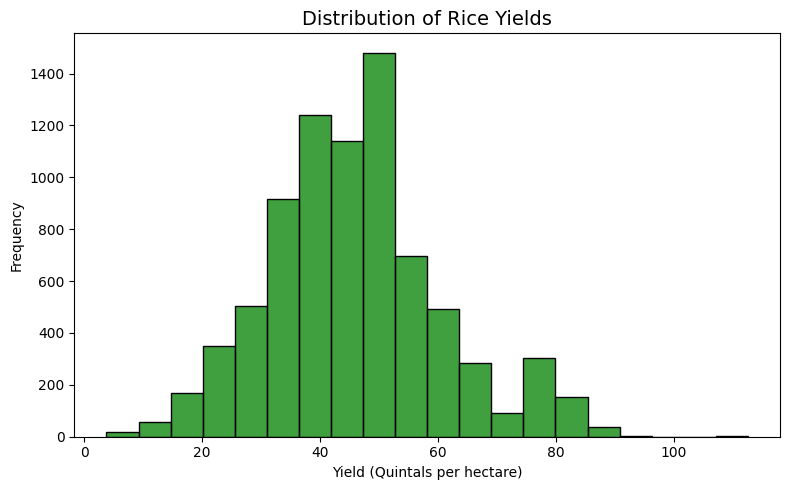

In [11]:
crop_dist(yields["L-tonPerHectare"] *10 , "Rice")

In [12]:
print(yields["L-tonPerHectare"].value_counts())

L-tonPerHectare
5.00    571
4.00    399
4.50    375
3.75    300
7.50    265
       ... 
1.48      1
0.83      1
0.77      1
0.72      1
6.29      1
Name: count, Length: 565, dtype: int64


In [13]:
print(yields['D-q409_varType'].value_counts())

D-q409_varType
Improved    5787
Hybrid      1491
Local        625
Basmati       20
Unknown       12
Name: count, dtype: int64


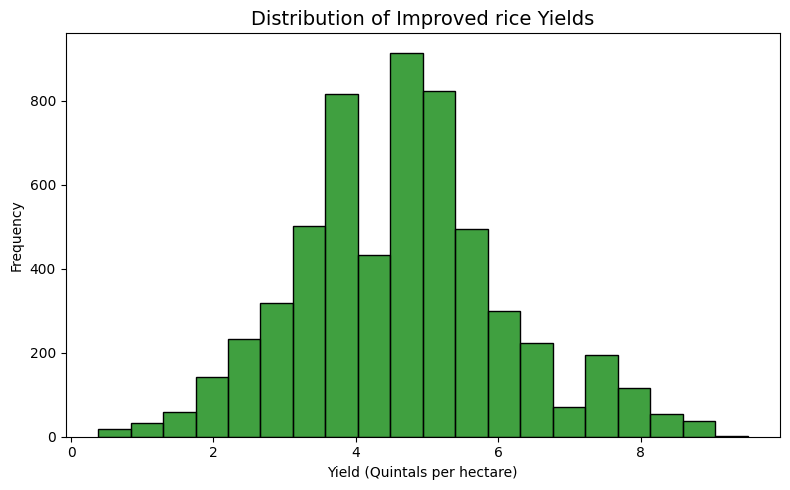

In [14]:
crop_dist(improved["L-tonPerHectare"], "Improved rice")

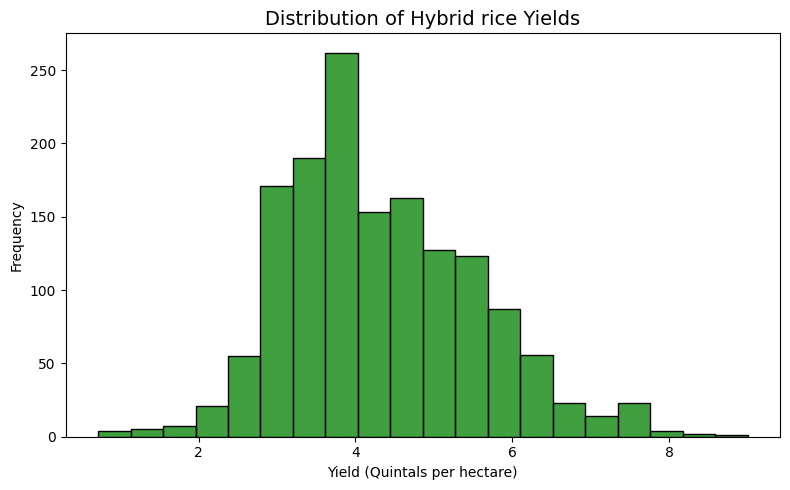

In [15]:
crop_dist(hybrid["L-tonPerHectare"], "Hybrid rice")

In [16]:
# describe price of each crop type (no filtering)
improved = yields[yields['D-q409_varType']== 'Improved']
print(improved["M-q706_cropSP"].describe())
print()

hybrid = yields[yields['D-q409_varType']== 'Hybrid']
print(hybrid["M-q706_cropSP"].describe())
print()

local = yields[yields['D-q409_varType']== 'Local']
print(local["M-q706_cropSP"].describe())
print()

basmati = yields[yields['D-q409_varType']== 'Basmati']
print(basmati["M-q706_cropSP"].describe())
print()

count     5786.000000
mean      1554.753244
std        357.368728
min          0.000000
25%       1400.000000
50%       1500.000000
75%       1750.000000
max      17352.000000
Name: M-q706_cropSP, dtype: float64

count    1491.000000
mean     1481.944668
std       396.440742
min        14.500000
25%      1300.000000
50%      1400.000000
75%      1500.000000
max      3500.000000
Name: M-q706_cropSP, dtype: float64

count     625.000000
mean     1831.515200
std       852.269074
min         0.000000
25%      1250.000000
50%      1400.000000
75%      1850.000000
max      4000.000000
Name: M-q706_cropSP, dtype: float64

count      20.000000
mean     2523.900000
std       606.662127
min      1500.000000
25%      2000.000000
50%      2500.000000
75%      3000.000000
max      3600.000000
Name: M-q706_cropSP, dtype: float64



In [17]:
#Plot price function
def price_dist(price_series, cropname):
    # Convert to numeric and filter out invalid or high prices
    price_series = pd.to_numeric(price_series, errors='coerce')
    price_series = price_series[price_series <= 10000] * 0.012
    price_series = price_series.dropna()

    plt.figure(figsize=(8, 5))

    # Plot histogram with seaborn
    sns.histplot(price_series, bins=20, kde=False, color='green')

    # Labels and title
    plt.xlabel('Selling Price (Dollar per quintal)')
    plt.ylabel('Frequency')
    plt.title(f"Distribution of {cropname} Selling Prices", fontsize=14)

    # Save and show
    plt.tight_layout()
    plt.savefig(f"Figures/lol_{cropname}_price.png", dpi=300)
    plt.show()

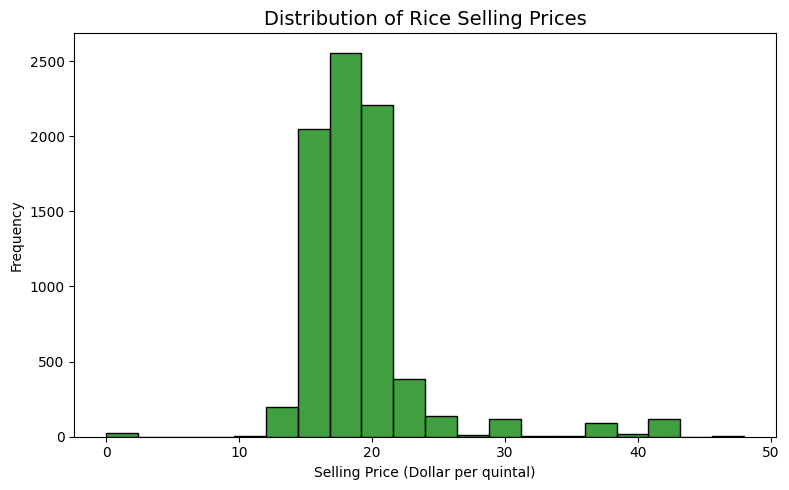

In [18]:
# Drop outlier and plot prices
yields = yields[yields['M-q706_cropSP'] <= 10000] 
price_dist(yields["M-q706_cropSP"], "Rice")

In [19]:
# Transformed data used for statistics

yields = pd.read_csv("crop_yield.csv", low_memory=False)
yields = yields[(yields['M-q706_cropSP'] < 10000) & (yields['M-q706_cropSP'] > 0)].copy()  # Remove outliers
yields = yields[yields['C-q306_cropLarestAreaAcre'] > 0]

acres = yields['C-q306_cropLarestAreaAcre'].median()
hectares =  acres / 2.47105  # Convert hectares to hectares

# Convert yield per hectare to quintale per hectare
yields['median_farm_yield_quintale'] = yields['L-tonPerHectare'] *10 * hectares

rupy_to_dollar = 0.012
yields['dollar_spot_price'] = yields['M-q706_cropSP'] * rupy_to_dollar  # Convert to dollar

yields['price_quantity'] = yields['dollar_spot_price'] * yields['median_farm_yield_quintale']  # Price times quantity

yields_improved = yields[yields['D-q409_varType']== 'Improved']
yields_hybrid = yields[yields['D-q409_varType']== 'Hybrid']
yields_local = yields[yields['D-q409_varType']== 'Local']


mean_price_improved =  yields_improved['M-q706_cropSP'].mean() 
mean_price_hybrid =  yields_hybrid['M-q706_cropSP'].mean() 
mean_price_local =  yields_local['M-q706_cropSP'].mean()

print("Price improved", mean_price_improved)
print("Price hybrid", mean_price_hybrid)
print("Price local", mean_price_local)

mean_yield_improved = yields_improved['L-tonPerHectare'].mean() *10
mean_yield_hybrid = yields_hybrid['L-tonPerHectare'].mean() *10
mean_yield_local = yields_local['L-tonPerHectare'].mean() *10

print("Mean yield improved", mean_yield_improved)
print("Mean yield hybrid", mean_yield_hybrid)
print("Mean yield local", mean_yield_local)

Price improved 1562.9735582208896
Price hybrid 1508.6216635630044
Price local 1836.3952
Mean yield improved 46.96119510529735
Mean yield hybrid 45.463438239099936
Mean yield local 47.41536


# This code was only used privatly, and remains unused in the project, for completeness it is given, it might contain errors

In [20]:
def plot_harvest_vs_price(df, harvest_col='harvest_amount', price_col='price_sold'):
    """
    Plots harvest amount against price sold.

    Parameters:
    - df: pandas DataFrame with harvest amount and price sold columns
    - harvest_col: column name for harvest amount (default 'harvest_amount')
    - price_col: column name for prices sold (default 'price_sold')
    """
    
    plt.figure(figsize=(10, 5))
    plt.scatter(df[harvest_col], df[price_col])
    plt.title("Harvest Amount vs. Price Sold")
    plt.xlabel("Harvest Amount")
    plt.ylabel("Price Sold")
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()


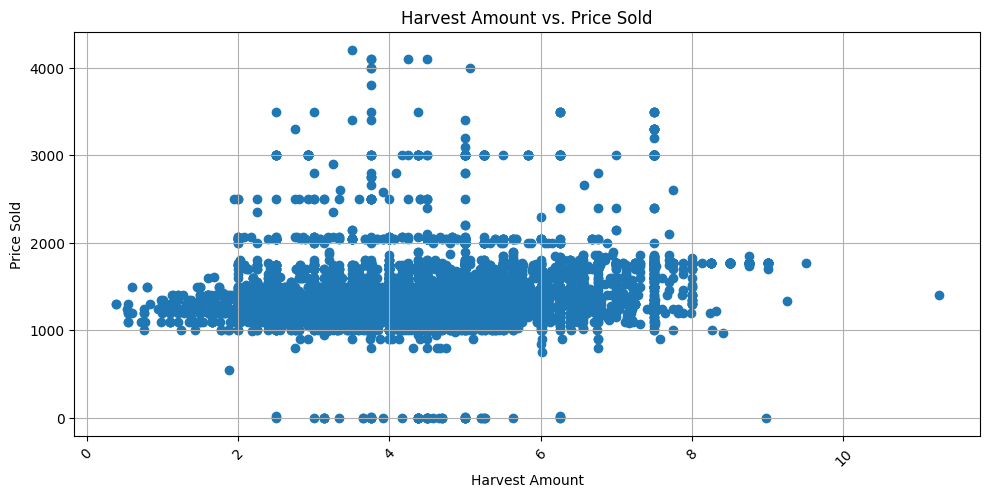

In [21]:
plot_harvest_vs_price(yields, harvest_col='L-tonPerHectare', price_col='L-q607_farmGatePrice')

In [23]:
def scatter_plot_limited(df, x_col, y_col):
    """
    Creates a scatter plot between two columns with axis limits set to (0, 5000).

    Parameters:
    - df: pandas DataFrame
    - x_col: name of the column for the x-axis
    - y_col: name of the column for the y-axis
    - xlim: tuple for x-axis limits (default (0, 5000))
    - ylim: tuple for y-axis limits (default (0, 5000))
    """
    fig = plt.figure(figsize=(8, 6))
    ax = fig.gca()
    ax.scatter(df[x_col], df[y_col], alpha=0.7)

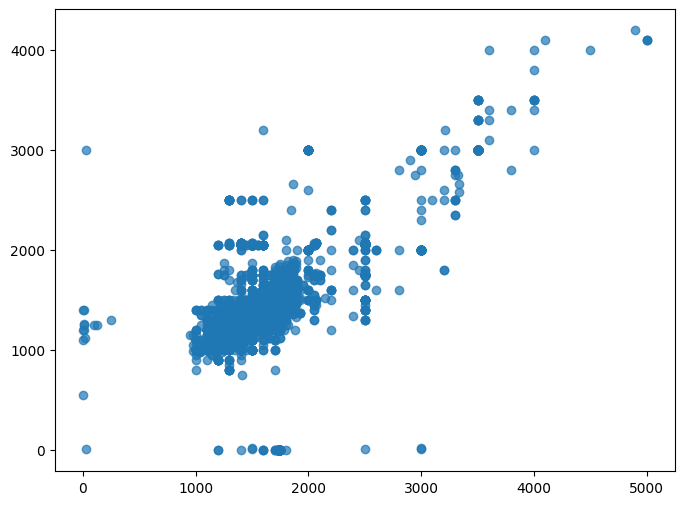

In [24]:
yields = yields[yields['M-q706_cropSP'] <= 10000] 
scatter_plot_limited(yields, 'M-q706_cropSP', 'L-q607_farmGatePrice')

In [25]:
yields[['L-tonPerHectare', 'L-q607_farmGatePrice']].cov()

,L-tonPerHectare,L-q607_farmGatePrice
L-tonPerHectare,2.225463,143.430730
L-q607_farmGatePrice,143.430730,146555.780684


In [26]:
yields[['L-tonPerHectare', 'L-q607_farmGatePrice']].corr()

,L-tonPerHectare,L-q607_farmGatePrice
L-tonPerHectare,1.000000,0.251148
L-q607_farmGatePrice,0.251148,1.000000


(array([5.800e+01, 0.000e+00, 1.000e+00, 9.000e+00, 1.900e+02, 2.183e+03,
        2.981e+03, 1.257e+03, 1.063e+03, 2.820e+02, 9.000e+00, 3.900e+01,
        5.000e+00, 1.000e+01, 1.720e+02, 9.000e+00, 1.500e+01, 0.000e+00,
        1.000e+00, 8.000e+00]),
 array([   0.,  210.,  420.,  630.,  840., 1050., 1260., 1470., 1680.,
        1890., 2100., 2310., 2520., 2730., 2940., 3150., 3360., 3570.,
        3780., 3990., 4200.]),
 <BarContainer object of 20 artists>)

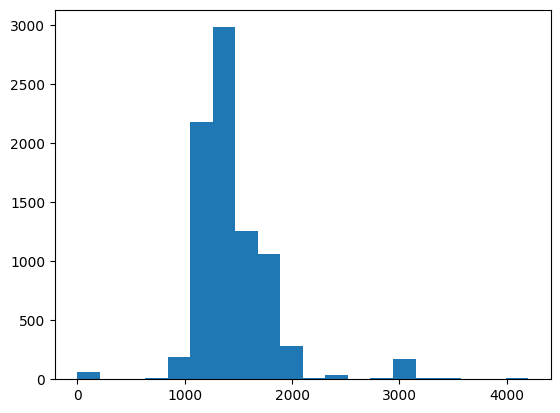

In [27]:
plt.hist(yields['L-q607_farmGatePrice'], bins =20)

In [28]:
def test_normality_ks(series):
    """
    Tests normality of a pandas Series using the Kolmogorov-Smirnov test.

    Parameters:
    - series: pandas Series (numeric)

    Returns:
    - statistic: KS test statistic
    - p_value: p-value of the test
    """
    data = pd.to_numeric(series, errors='coerce').dropna()
    if len(data) == 0:
        raise ValueError("Input series contains no valid numeric data.")
    mu, sigma = ss.norm.fit(data)
    statistic, p_value = ss.kstest(data, 'norm', args=(mu, sigma))
    print(f"KS statistic: {statistic:.4f}, p-value: {p_value:.4g}")
    return statistic, p_value

In [29]:
statistic, p_value =  test_normality_ks(yields["L-tonPerHectare"])
statistic, p_value = test_normality_ks(yields["M-q706_cropSP"])

KS statistic: 0.0753, p-value: 2.528e-41
KS statistic: 0.1799, p-value: 2.441e-235


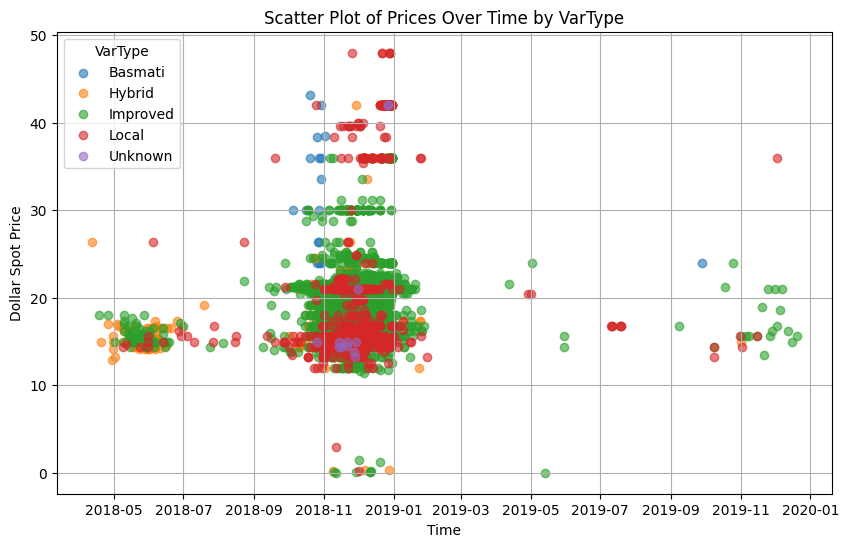

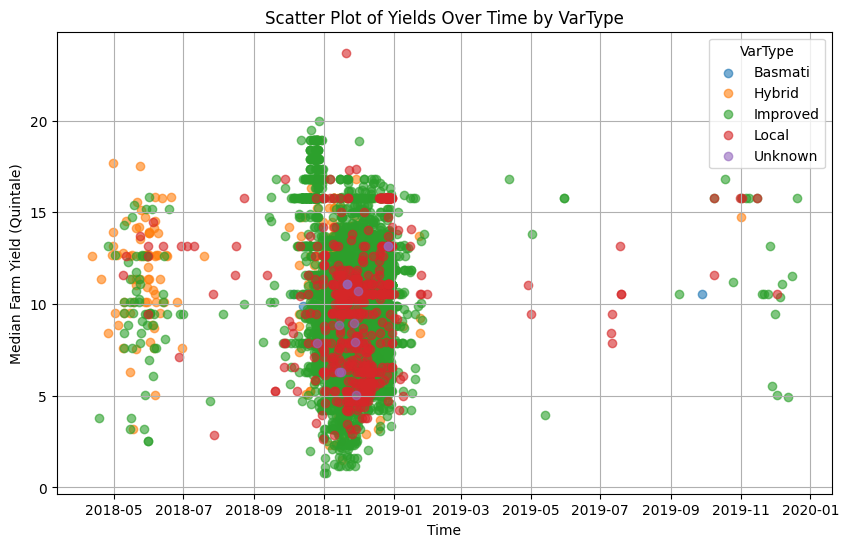

In [30]:
# Ensure the 'time' column is in datetime format
yields['time'] = pd.to_datetime(yields['L-q601_harvestDate'], errors='coerce', dayfirst=True)

# Filter out rows with invalid or missing time values
yields = yields.dropna(subset=['time'])

# Limit time to 2018-04 to 2019-01
start_date = '2018-04-01'
end_date = '2020-01-31'
yields = yields[(yields['time'] >= start_date) & (yields['time'] <= end_date)]

# Create a scatter plot
plt.figure(figsize=(10, 6))
for var_type, group in yields.groupby('D-q409_varType'):
    plt.scatter(group['time'], group['dollar_spot_price'], label=var_type, alpha=0.6)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Dollar Spot Price')
plt.title('Scatter Plot of Prices Over Time by VarType')
plt.legend(title='VarType')
plt.grid(True)
plt.show()


# Create a scatter plot for yields over time
plt.figure(figsize=(10, 6))
for var_type, group in yields.groupby('D-q409_varType'):
    plt.scatter(group['time'], group['median_farm_yield_quintale'], label=var_type, alpha=0.6)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Median Farm Yield (Quintale)')
plt.title('Scatter Plot of Yields Over Time by VarType')
plt.legend(title='VarType')
plt.grid(True)
plt.show()

In [31]:
yields[['time','dollar_spot_price', 'median_farm_yield_quintale']].corr()

,time,dollar_spot_price,median_farm_yield_quintale
time,1.000000,0.122456,-0.036808
dollar_spot_price,0.122456,1.000000,0.199136
median_farm_yield_quintale,-0.036808,0.199136,1.000000
